### Neural Net Math Project Notebook

This is a notebook for supervised machine learning project in Neural Network Mathematics class. 

Group members: Luke, Akshay, Yile

#### variable names explanation:
| Var name | Feature name | Description|
|---|---|---|
|pos      | Num posts    | Number of total posts that the user has ever posted.|
|flg      | Num following | Number of following|
|flr      | Num followers | Number of followers|
|bl | Biography length | Length (number of characters) of the user's biography|
|pic | Picture availability | Value 0 if the user has no profile picture, or 1 if has|
|lin | Link availability | Value 0 if the user has no external URL, or 1 if has|
|cl | Average caption length | The average number of character of captions in media|
|cz | Caption zero | Percentage (0.0 to 1.0) of captions that has almost zero (<=3) length|
|ni | Non image percentage | Percentage (0.0 to 1.0) of non-image media. There are three types of media on an Instagram post, i.e. image, video, carousel|
|erl | Engagement rate (Like) | Engagement rate (ER) is commonly defined as (num likes) divide by (num media) divide by (num followers)|
|erc | Engagement rate (Comm.) | Similar to ER like, but it is for comments|
|lt | Location tag percentage | Percentage (0.0 to 1.0) of posts tagged with location|
|hc | Average hashtag count | Average number of hashtags used in a post|
|pr | Promotional keywords | Average use of promotional keywords in hashtag, i.e. {regrann, contest, repost, giveaway, mention, share, give away, quiz}|
|fo | Followers keywords | Average use of followers hunter keywords in hashtag, i.e. {follow, like, folback, follback, f4f}|
|cs | Cosine similarity | Average cosine similarity of between all pair of two posts a user has|
|pi | Post interval | Average interval between posts (in hours)|

The logistic probability model is

$ \hat{p}(s, \theta) = [1 + e^{-\hat{y}(s, \theta)}]^{-1} $

The $\hat{y}$ is defined as:

$ \hat{y}(s, \theta) = \theta^T [s^T 1]^T  $

The objective function is defined as

$ c([y,s], \theta) = - y  log\hat{p}(s, \theta) - (1-y)log(1-\hat{p}(s, \theta)) $

The loss function is

$ l_{n}(\theta) = -(1/n)\sum_{i=1}^{n} c([y,s], \theta) $

The gradient descent process is

$ \frac{dc_{i}}{d\theta} = -(y_i - \hat{y}_i) [s_i^{T}, 1] $ 

In [1]:
# import libraries and packages
import numpy as np
import pandas as pd
import time
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# read the data
df_data = pd.read_csv("data/user_fake_authentic_2class.csv")
# training features size: 65326 x 17
data_x = df_data.iloc[:,:-1]

# label types: r=real and f=fake
data_y = df_data.iloc[:,-1:]
# convert to 0:fake, 1:real
data_y = data_y.replace({'class':{"r": 1, "f":0}})

df_data

,pos,flw,flg,bl,pic,lin,cl,cz,ni,erl,erc,lt,hc,pr,fo,cs,pi,class
0,44,48,325,33,1,0,12,0.000000,0.000,0.000000,0.00,0.000,0.000,0.0,0.000,0.111111,0.094985,f
1,10,66,321,150,1,0,213,0.000000,1.000,14.390000,1.97,0.000,1.500,0.0,0.000,0.206826,230.412857,f
2,33,970,308,101,1,1,436,0.000000,1.000,10.100000,0.30,0.000,2.500,0.0,0.056,0.572174,43.569939,f
3,70,86,360,14,1,0,0,1.000000,0.000,0.780000,0.06,0.000,0.000,0.0,0.000,1.000000,5.859799,f
4,3,21,285,73,1,0,93,0.000000,0.000,14.290000,0.00,0.667,0.000,0.0,0.000,0.300494,0.126019,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65321,13,145,642,0,1,0,7,0.461538,0.000,14.270000,0.58,0.000,0.077,0.0,0.000,0.192308,1745.291260,r
65322,652,3000,1300,146,1,1,384,0.000000,0.389,8.520000,0.13,0.000,1.611,0.0,0.000,0.169917,54.629120,r
65323,1500,3700,3200,147,1,1,129,0.000000,0.111,9.390000,0.31,0.722,0.000,0.0,0.056,0.058908,129.802048,r
65324,329,1500,1800,218,1,1,290,0.055556,0.000,6.350000,0.26,0.222,0.500,0.0,0.000,0.103174,53.402840,r


In [3]:
# normalize 
norm_x = preprocessing.normalize(data_x)
norm_x = pd.DataFrame(norm_x, columns=data_x.columns)

norm_x

,pos,flw,flg,bl,pic,lin,cl,cz,ni,erl,erc,lt,hc,pr,fo,cs,pi
0,0.132007,0.144008,0.975053,0.099005,0.003000,0.000000,0.036002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000333,0.000285
1,0.020912,0.138019,0.671273,0.313679,0.002091,0.000000,0.445424,0.000000,0.002091,0.030092,0.004120,0.000000,0.003137,0.0,0.000000,0.000433,0.481838
2,0.029645,0.871381,0.276686,0.090731,0.000898,0.000898,0.391672,0.000000,0.000898,0.009073,0.000269,0.000000,0.002246,0.0,0.000050,0.000514,0.039140
3,0.185676,0.228116,0.954904,0.037135,0.002653,0.000000,0.000000,0.002653,0.000000,0.002069,0.000159,0.000000,0.000000,0.0,0.000000,0.002653,0.015543
4,0.009690,0.067827,0.920511,0.235780,0.003230,0.000000,0.300377,0.000000,0.000000,0.046155,0.000000,0.002154,0.000000,0.0,0.000000,0.000971,0.000407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65321,0.006969,0.077732,0.344165,0.000000,0.000536,0.000000,0.003753,0.000247,0.000000,0.007650,0.000311,0.000000,0.000041,0.0,0.000000,0.000103,0.935621
65322,0.194071,0.892962,0.386950,0.043458,0.000298,0.000298,0.114299,0.000000,0.000116,0.002536,0.000039,0.000000,0.000480,0.0,0.000000,0.000051,0.016261
65323,0.292853,0.722370,0.624752,0.028700,0.000195,0.000195,0.025185,0.000000,0.000022,0.001833,0.000061,0.000141,0.000000,0.0,0.000011,0.000012,0.025342
65324,0.137409,0.626483,0.751780,0.091049,0.000418,0.000418,0.121120,0.000023,0.000000,0.002652,0.000109,0.000093,0.000209,0.0,0.000000,0.000043,0.022304


In [4]:
# svd? Could implement a PCA for dimension reduction 

In [5]:
# define a class for logistic regression

"""
In our logistic regression model, there are several parameters need to be pre-defined:
    1. gamma, learning rate
    2. max_iters, the iteration number for the gradient descent
    3. data_x, the training dataset
    4. data_y, the prediction outcome
"""

class Modeling:

    def __init__(self, theta, gamma = 0.0001, max_iters = 1000):
        self.gamma = gamma
        self.max_iters = max_iters
        self.theta = theta
        self.grad = None
    

    def _s_one(self, data_x):
        data_x_yhat = data_x
        data_x_yhat["y_hat"] = np.ones(len(data_x.index))
        return data_x_yhat

    def _y_hat_func(self, data_x_yhat):
        y_hat = np.matmul(data_x_yhat, self.theta)
        return y_hat
            
    def _loss_func(self, x):
        objective_func = -1 * data_y * np.log(self._logistic(x)) - (1-data_y) * np.log(1-self._logistic(x))
        loss = 1/len(data_y)* sum(objective_func)
        return loss

    
    def _gradient_descent_func(self, data_y, y_hat, data_x_yhat):
        gradient = np.matmul(-1*(np.array(data_y).flatten() - y_hat).T, np.array(data_x_yhat))
        gradient_vector = gradient.flatten()
        return gradient_vector

    # the objective function, y_hat = the prediction results from logistic regression
    def gradient_iteration(self, data_x, data_y):
        # gradient descent
        grad = []
        t = 0
        gradnorm = np.inf
        while gradnorm >= 0.001 and t <= self.max_iters:
            data_x_yhat  = self._s_one(data_x)
            y_hat = self._y_hat_func(data_x_yhat)
            # The gradient descent 
            gradient_loss = self._gradient_descent_func(data_y, y_hat, data_x_yhat)
            gt = gradient_loss
            self.theta -= self.gamma*gt
            gradnorm = max(abs(gt))
            t += 1
            # print(f"Iternation: {t}; gradnorm = {gradnorm}")
            grad.append(gradnorm)
        return self.theta, grad
        
    def _logistic(self, x):
        return (1/(1+np.exp(-x)))

    def fitting(self, data_x):
        data_x_y_hat = self._s_one(data_x)
        y_hat_prob = self._logistic(self._y_hat_func(data_x_y_hat))
        y_hat_binary = [1 if i>0.5 else 0 for i in y_hat_prob]
        return y_hat_binary, y_hat_prob
    

In [6]:
# model training process
start = time.time()
# initiate the theta
init_theta = np.zeros(len(df_data.columns))
# find the values
model = Modeling(theta = init_theta, gamma = 0.00001, max_iters=1000)
thetas, grad = model.gradient_iteration(norm_x, data_y)
y_hat_binary, y_hat_prob = model.fitting(norm_x)

end = time.time()

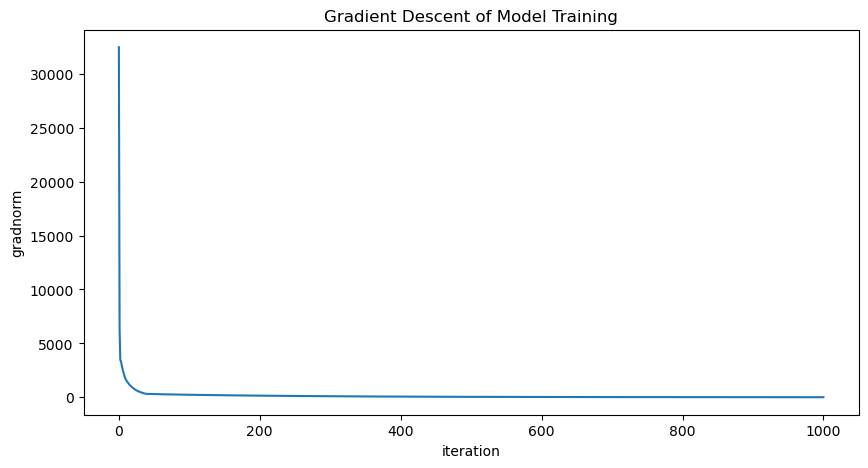

In [7]:
def grad_desc_viz(grad):
    # visualization the gradient descent
    fig = plt.figure(figsize=(10, 5))
    axes = fig.add_subplot(111)
    axes.plot(grad)
    axes.set_xlabel("iteration")
    axes.set_ylabel("gradnorm")
    plt.title("Gradient Descent of Model Training")
    plt.show()

grad_desc_viz(grad=grad)

In [8]:
def accuracy(y, y_hat):
    accuracy = np.sum(np.equal(y, y_hat))/len(y)
    return accuracy

print(f"The accuracy of the Logistic regression is {accuracy(np.array(data_y.values.tolist()).flatten(), np.array(y_hat_binary))}, spending {end-start}s")


The accuracy of the Logistic regression is 0.49689250834277315, spending 6.720777988433838s


In [9]:
# train and test split
x_train, x_test, y_train, y_test = train_test_split(
    norm_x, data_y, test_size = .3, random_state=42,
    stratify = data_y)

In [11]:
# model training process with training data
start = time.time()
# initiate the theta
init_theta = np.zeros(len(df_data.columns))
# find the values
model_train = Modeling(theta = init_theta, gamma = 0.00001, max_iters=1000)
thetas_train, grad_train = model_train.gradient_iteration(x_train, y_train)
y_hat_train,_ = model_train.fitting(x_train)
y_hat_test,_ = model_train.fitting(x_test)

end = time.time()

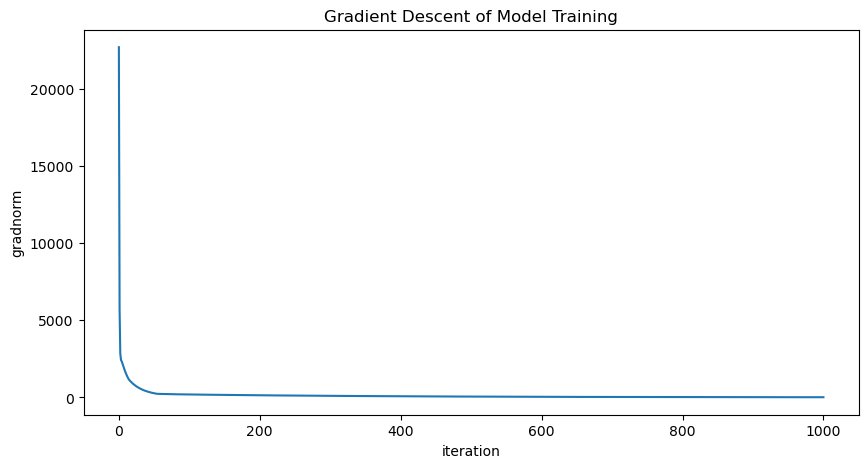

In [12]:
grad_desc_viz(grad_train)